In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from sklearn.model_selection import train_test_split

In [3]:
tracks= utils.load('fma_metadata/tracks.csv')

In [4]:
tracks[tracks['set','subset']=='small'].index

Int64Index([     2,      5,     10,    140,    141,    148,    182,    190,
               193,    194,
            ...
            153956, 154303, 154305, 154306, 154307, 154308, 154309, 154413,
            154414, 155066],
           dtype='int64', name='track_id', length=8000)

In [5]:
df= pd.read_csv('fma_metadata/ts_dataset_Fede.csv', index_col='track_id')

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,2087.718374,2048.793779,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,1086.371810,1345.396506,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977
148,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,1632.183927,1771.411672,...,1613.198016,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248
182,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,2259.879382,2154.652270,...,1659.613066,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617
255,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,876.318176,734.271712,...,909.310526,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442


In [7]:
genre= tracks[[('track', 'genre_top')]]

In [8]:
genre.columns= genre.columns.droplevel(0)

In [9]:
df= df.join(genre)

In [10]:
df['genre_top'].value_counts()

Electronic             999
Experimental           999
Rock                   999
Hip-Hop                997
Blues                    0
Classical                0
Country                  0
Easy Listening           0
Folk                     0
Instrumental             0
International            0
Jazz                     0
Old-Time / Historic      0
Pop                      0
Soul-RnB                 0
Spoken                   0
Name: genre_top, dtype: int64

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,...,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,1304.075947,1352.370243,1391.096193,1394.039413,1395.704929,1397.309872,1401.805997,1399.040898,1397.210897,1394.757308,...,1409.816406,1407.060158,1407.841361,1408.331980,1407.215280,1407.609869,1406.419867,1399.377531,1398.990116,1404.103612
std,541.134264,536.369890,536.956155,535.189624,532.915739,532.533308,534.305658,537.718622,543.486847,542.020595,...,541.308730,540.306882,543.537878,544.666943,545.597572,551.828087,551.536363,549.569987,528.357394,501.147884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,911.830547,976.425761,1022.576391,1019.838703,1019.462452,1022.625475,1016.918783,1021.281246,1022.184112,1015.562465,...,1026.465947,1016.603676,1017.254390,1022.377325,1017.293525,1014.748532,1016.926485,1007.332400,1015.465253,1046.225633
50%,1273.946925,1338.355548,1378.426165,1377.989745,1380.087193,1389.011331,1393.168822,1386.416039,1387.621809,1399.502829,...,1404.193088,1399.290729,1406.032551,1404.337371,1398.180653,1399.175449,1404.565670,1395.634196,1380.343266,1367.389611
75%,1663.551256,1705.830409,1739.756751,1753.821145,1755.619213,1746.308823,1751.457183,1744.286552,1743.536502,1737.809315,...,1761.502165,1762.393595,1752.793698,1750.484229,1760.966162,1769.621757,1761.025486,1759.942211,1731.674159,1708.778714
max,3999.691442,3932.304646,3975.453221,3835.070405,3515.377129,3401.722822,3483.062288,3884.104515,3703.724175,4089.562276,...,4115.623947,4036.812563,4058.967404,3930.952360,3818.211354,3704.855516,4022.943220,3785.097025,3992.754284,4167.533675


In [12]:
attr=[]
for col in df.columns:
    if(col!='genre_top'):
        attr.append(col)  

In [13]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
df[attr] = scaler.fit_transform(df[attr].values).squeeze()

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,648,649,650,651,652,653,654,655,656,genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548,Hip-Hop
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621,Hip-Hop
148,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,1.257842,...,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055,Experimental
182,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,1.679941,...,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535,Rock
255,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,-1.260999,...,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,-1.459256,-1.172778,...,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442,Hip-Hop
154307,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,-0.250479,-0.323848,...,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573,Hip-Hop
154308,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,1.364934,2.620067,...,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379,Hip-Hop


In [15]:
del(genre)
del(tracks)

## Approximation

In [16]:
sax= SymbolicAggregateApproximation(n_segments=50, alphabet_size_avg=8)

In [17]:
X= df[attr].values
y= df['genre_top']

In [18]:
X_small,_,y_small,_= train_test_split( X, y, test_size=X.shape[0]-400, random_state=0, stratify=y)

In [19]:
X_small.shape

(400, 657)

In [20]:
y_small.value_counts()

Electronic             100
Experimental           100
Hip-Hop                100
Rock                   100
Blues                    0
Classical                0
Country                  0
Easy Listening           0
Folk                     0
Instrumental             0
International            0
Jazz                     0
Old-Time / Historic      0
Pop                      0
Soul-RnB                 0
Spoken                   0
Name: genre_top, dtype: int64

In [21]:
X_sax= sax.fit_transform(X_small).squeeze()

C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 400 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [22]:
X_sax

array([[6, 6, 1, ..., 7, 7, 6],
       [0, 1, 1, ..., 7, 7, 7],
       [2, 2, 2, ..., 0, 3, 2],
       ...,
       [6, 5, 3, ..., 2, 5, 5],
       [1, 3, 3, ..., 3, 5, 5],
       [2, 1, 0, ..., 2, 6, 1]])

In [23]:
X_sax.shape

(400, 50)

In [24]:
inv = sax.inverse_transform(X_sax)

C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 400 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [25]:
map_symbols = {k: v for v, k in enumerate(np.unique(inv.ravel()))}
map_symbols

{-1.5341205443525463: 0,
 -0.887146559018876: 1,
 -0.4887764111146695: 2,
 -0.1573106846101707: 3,
 0.0: 4,
 0.1573106846101707: 5,
 0.4887764111146695: 6,
 0.887146559018876: 7,
 1.5341205443525463: 8}

In [26]:
sax.breakpoints_avg_

array([-1.15034938, -0.67448975, -0.31863936,  0.        ,  0.31863936,
        0.67448975,  1.15034938])

In [27]:
np.unique(X_sax)

array([0, 1, 2, 3, 4, 5, 6, 7])

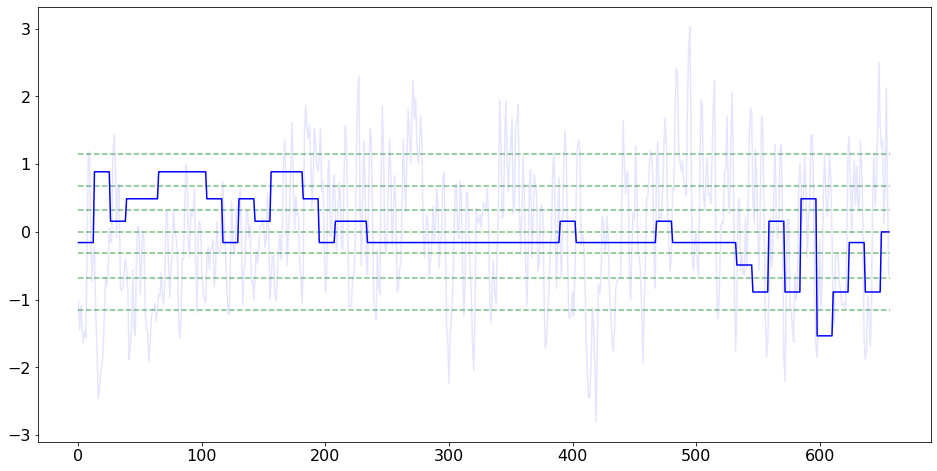

In [30]:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.figure(figsize=(16, 8))
plt.plot(df[attr].iloc[167].values, "b-", alpha=0.1)
plt.plot(inv[167], "b-")
plt.hlines(sax.breakpoints_avg_, xmin=0, xmax=657, color="g", linestyles='dashed', alpha=0.5)
plt.show()

In [28]:
from prefixspan import PrefixSpan

In [29]:
ps= PrefixSpan(X_sax)

In [39]:
%%time
freq= ps.frequent(200, closed=True, filter=lambda patt, matches: len(patt) <=1)

Wall time: 9min 1s


In [40]:
def getKey(item):
    return item[0]

In [41]:
sorted(freq, key= getKey, reverse=True)

[(400, [3]),
 (396, [2]),
 (394, [5]),
 (394, [4]),
 (385, [6]),
 (382, [1]),
 (301, [7]),
 (228, [0])]

In [416]:
res=[]

In [417]:
for i in range(0,10):
    ps.topk(1, filter=lambda patt, matches: len(patt) > i, callback= index, closed=True)

In [418]:
sup=[]
for r in res:
    sup.append(r[0])

In [419]:
n_seq= np.arange(1,11)

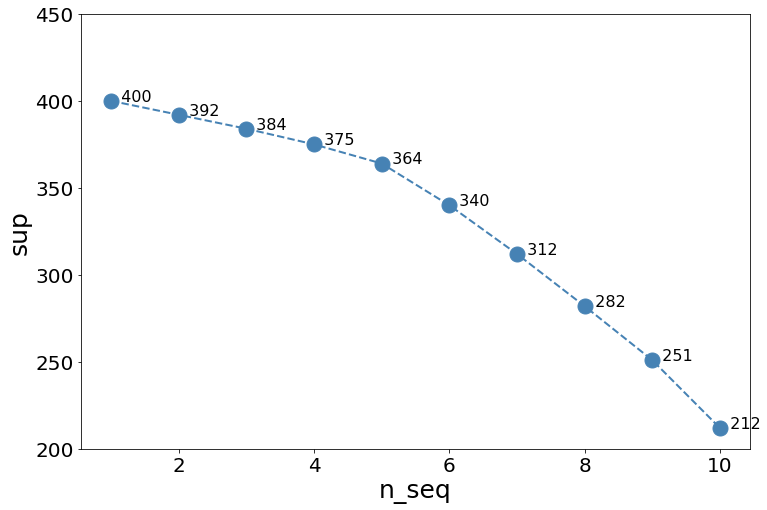

In [420]:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.figure(figsize=(12, 8))
plt.plot(n_seq, sup, color='steelblue', marker='o', linestyle='dashed', linewidth=2, markersize=15)
plt.xlabel('n_seq')
plt.ylim(200,450)
plt.ylabel('sup')
for a,b in zip(n_seq, sup): 
    plt.text(a, b, '  '+str(b), fontsize=16)
plt.show()

In [30]:
res=[]
def index(patt,matches):
    res.append((len(matches),patt,[i for i,_ in matches]))

In [31]:
ps.topk(5, filter=lambda patt, matches: len(patt) >=8, callback= index, closed=True)

In [32]:
res

[(282,
  [3, 3, 3, 3, 3, 3, 3, 3],
  [3,
   6,
   7,
   10,
   11,
   13,
   16,
   17,
   19,
   21,
   22,
   24,
   25,
   26,
   28,
   30,
   31,
   32,
   35,
   36,
   38,
   39,
   41,
   42,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   64,
   66,
   67,
   69,
   70,
   71,
   72,
   73,
   74,
   77,
   78,
   79,
   80,
   81,
   86,
   87,
   89,
   91,
   92,
   93,
   94,
   96,
   97,
   98,
   99,
   101,
   102,
   103,
   105,
   107,
   108,
   109,
   110,
   111,
   112,
   114,
   115,
   116,
   119,
   120,
   121,
   122,
   123,
   124,
   126,
   129,
   131,
   134,
   135,
   138,
   140,
   141,
   144,
   145,
   148,
   149,
   150,
   152,
   153,
   154,
   155,
   156,
   157,
   159,
   161,
   162,
   164,
   165,
   166,
   167,
   169,
   170,
   172,
   173,
   174,
   176,
   177,
   178,
   179,
   180,
   182,
   189,
   190,
   191,
   193,
   196,
   197,
   

In [33]:
for r in res:
    print(r[1])

[3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 4, 4, 3, 3]
[3, 3, 3, 3, 3, 3, 4, 4]
[3, 3, 3, 3, 3, 4, 3, 3]
[3, 3, 3, 4, 3, 3, 3, 3]


In [34]:
for r in res:
    print(r[0])

282
276
273
273
273


In [492]:
res[1][2]

[3,
 5,
 7,
 10,
 11,
 13,
 14,
 16,
 17,
 19,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 31,
 32,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 59,
 61,
 62,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 77,
 78,
 80,
 81,
 82,
 85,
 86,
 87,
 89,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 105,
 107,
 108,
 109,
 111,
 112,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 129,
 131,
 135,
 137,
 138,
 140,
 141,
 142,
 143,
 144,
 145,
 148,
 149,
 152,
 153,
 155,
 156,
 157,
 159,
 161,
 162,
 164,
 165,
 166,
 167,
 169,
 170,
 172,
 173,
 174,
 176,
 177,
 180,
 182,
 185,
 189,
 190,
 191,
 192,
 193,
 195,
 196,
 197,
 198,
 200,
 202,
 203,
 204,
 205,
 206,
 207,
 210,
 211,
 212,
 213,
 214,
 215,
 217,
 218,
 219,
 220,
 221,
 222,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 235,
 236,
 237,
 239,
 242,
 245,
 246,
 247,
 249,
 251,
 252,
 253,
 255,
 257,
 258,
 259,
 260,
 262,
 263,
 26

In [47]:
mask= np.zeros(400, dtype=bool)

In [48]:
mask[res[4][2]]=1
mask

array([False, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,

In [37]:
pat1= np.unique(y_small[mask], return_counts=True)
pat1

(array(['Electronic', 'Experimental', 'Hip-Hop', 'Rock'], dtype=object),
 array([76, 60, 82, 64], dtype=int64))

In [40]:
pat2= np.unique(y_small[mask], return_counts=True)
pat2

(array(['Electronic', 'Experimental', 'Hip-Hop', 'Rock'], dtype=object),
 array([71, 60, 82, 63], dtype=int64))

In [43]:
pat3= np.unique(y_small[mask], return_counts=True)
pat3

(array(['Electronic', 'Experimental', 'Hip-Hop', 'Rock'], dtype=object),
 array([73, 61, 78, 61], dtype=int64))

In [46]:
pat4= np.unique(y_small[mask], return_counts=True)
pat4

(array(['Electronic', 'Experimental', 'Hip-Hop', 'Rock'], dtype=object),
 array([70, 60, 81, 62], dtype=int64))

In [49]:
pat5= np.unique(y_small[mask], return_counts=True)
pat5

(array(['Electronic', 'Experimental', 'Hip-Hop', 'Rock'], dtype=object),
 array([75, 60, 81, 57], dtype=int64))

In [69]:
np.array(['P1']*4+['P2']*5+['P3']*5+['P4']*5+['P5']*5).reshape(-1,1)

array([['P1'],
       ['P1'],
       ['P1'],
       ['P1'],
       ['P1'],
       ['P2'],
       ['P2'],
       ['P2'],
       ['P2'],
       ['P2'],
       ['P3'],
       ['P3'],
       ['P3'],
       ['P3'],
       ['P3'],
       ['P4'],
       ['P4'],
       ['P4'],
       ['P4'],
       ['P4'],
       ['P5'],
       ['P5'],
       ['P5'],
       ['P5'],
       ['P5']], dtype='<U2')

In [72]:
pat= pd.DataFrame(columns=['Pattern','Genre','Count'], index= np.arange(0,20))
pat['Pattern']= np.array(['P1']*4+['P2']*4+['P3']*4+['P4']*4+['P5']*4).reshape(-1,1)
pat['Genre']= np.array(['Electronic', 'Experimental', 'Hip-Hop', 'Rock']*5).reshape(-1,1)
pat['Count']= np.concatenate((pat1[1],pat2[1],pat3[1],pat3[1],pat5[1])).reshape(-1,1)

In [73]:
pat

,Pattern,Genre,Count
0,P1,Electronic,76
1,P1,Experimental,60
2,P1,Hip-Hop,82
3,P1,Rock,64
4,P2,Electronic,71
5,P2,Experimental,60
6,P2,Hip-Hop,82
7,P2,Rock,63
8,P3,Electronic,73
9,P3,Experimental,61


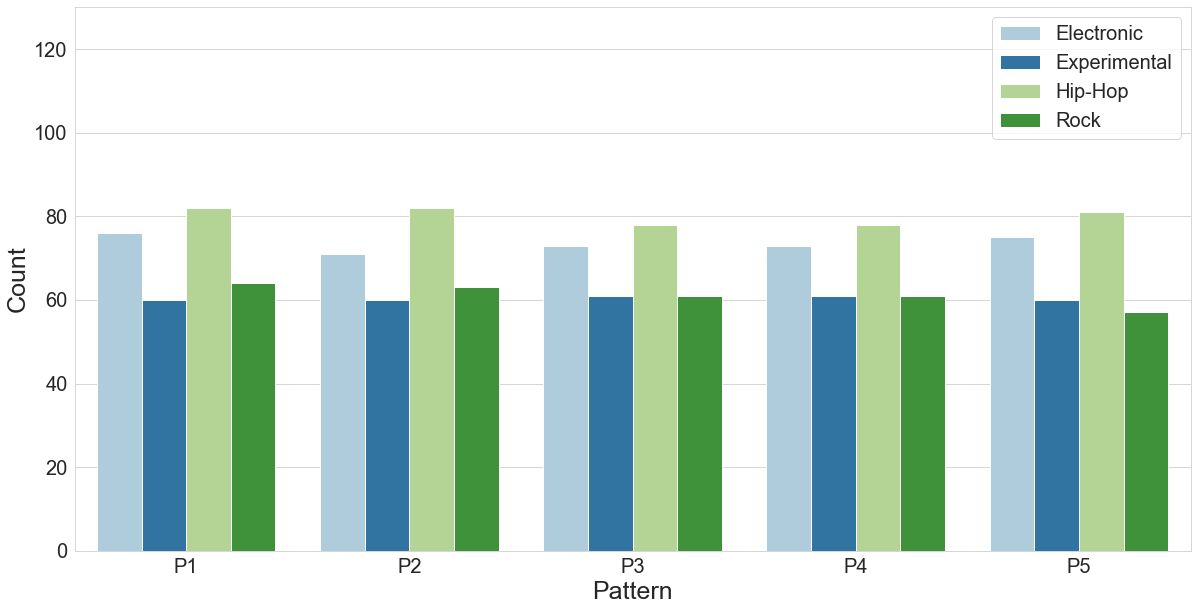

In [74]:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
sns.barplot(x="Pattern", hue="Genre", y="Count", data=pat, palette='Paired')
plt.legend(loc='upper right', fontsize=20)
plt.ylim(0,130)
plt.show()